In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [23]:
META = yf.Ticker("META")

In [24]:
META_DATA = META.history(period='5y')

In [25]:
FB = pd.DataFrame(META_DATA)
print(FB.head())

                                 Open        High         Low       Close  \
Date                                                                        
2019-06-13 00:00:00-04:00  175.343960  177.841310  174.424937  177.281906   
2019-06-14 00:00:00-04:00  180.318679  181.647271  179.809225  181.137817   
2019-06-17 00:00:00-04:00  184.813901  189.299148  184.214547  188.809662   
2019-06-18 00:00:00-04:00  193.794386  194.323823  187.081507  188.270248   
2019-06-19 00:00:00-04:00  186.801794  187.900634  184.354393  187.281281   

                             Volume  Dividends  Stock Splits  
Date                                                          
2019-06-13 00:00:00-04:00  12253600        0.0           0.0  
2019-06-14 00:00:00-04:00  16773700        0.0           0.0  
2019-06-17 00:00:00-04:00  29459900        0.0           0.0  
2019-06-18 00:00:00-04:00  37571400        0.0           0.0  
2019-06-19 00:00:00-04:00  21417100        0.0           0.0  


In [26]:
print(FB.dtypes)

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [27]:
FB['logReturn'] = np.log(FB['Close'].shift(-1)) - np.log(FB['Close'])

(array([ 0.07713282,  0.        ,  0.07713282,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.07713282,
         0.        ,  0.        ,  0.        ,  0.07713282,  0.        ,
         0.15426564,  0.15426564,  0.30853129,  0.61706257,  1.00272668,
         3.08531286,  3.16244569,  7.4818837 , 15.19516586, 21.90572133,
        17.27775204, 14.42383764,  5.63069598,  2.8539144 ,  1.31125797,
         0.84846104,  0.38566411,  0.38566411,  0.        ,  0.15426564,
         0.        ,  0.        ,  0.07713282,  0.        ,  0.        ,
         0.07713282,  0.        ,  0.07713282,  0.        ,  0.07713282]),
 array([-0.30639058, -0.29607662, -0.28576265, -0.27544869, -0.26513473,
        -0.25482077, -0.24450681, -0.23419285, -0.22387889, -0.21356492,
        -0.20325096, -0.192937  , -0.18262304, -0.17230908, -0.16199512,
        -0.15168116, -0.14136719, -0.13105323, -0

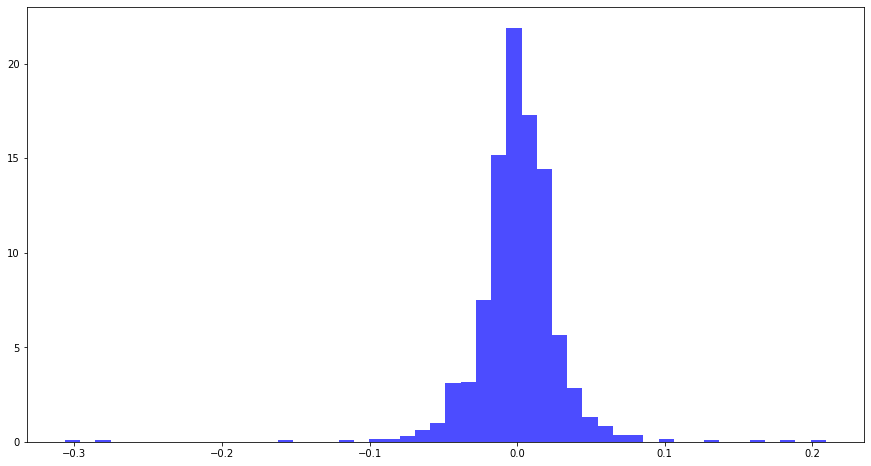

In [28]:
plt.figure(figsize=(15, 8))
plt.hist(FB['logReturn'], bins=50, density=True, alpha=0.7, color='blue', label='Histogram')

In [29]:
#estimate poppulation mean using interval of lower and upper bound (confidence interval).
#Standardize sample mean = ((score - population mean)/(std pop/sqrt(sample size)))
#Standardizing a normal random variable = standard normal following a z distribution

#values for calculating the 80% confidence interval

z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = FB['logReturn'].mean()
sample_std = FB['logReturn'].std(ddof=1)/(FB.shape[0])**0.5

interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

print('Sample mean is ', sample_mean)
print("80% confidence interval" )
print(interval_left, interval_right)

Sample mean is  0.0008388165970680209
80% confidence interval
-0.0001850242663956965 0.0018626574605317384


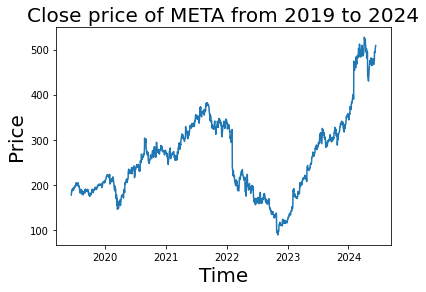

In [30]:
plt.title("Close price of META from 2019 to 2024", size=20)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)
plt.plot(FB.loc[:,"Close"])

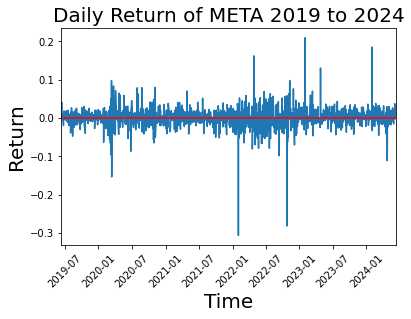

In [31]:
plt.title("Daily Return of META 2019 to 2024", size=20)
plt.xlabel("Time", size=20)
plt.xticks(rotation=45)
plt.ylabel("Return", size=20)
plt.xlim(FB.index[0], FB.index[-1])
plt.plot(FB.loc[:,"logReturn"])
plt.axhline(0, color="red")

In [37]:
#Hypothesis test
#null hypothesis = average daily return is 0
#alt hypothesis = average daily return is not 0
sample_mean = FB["logReturn"].mean()
std = FB["logReturn"].std(ddof=1)
size = FB["logReturn"].shape[0]
T = sample_mean/(std/size**0.5)
print(T)

1.0499548919551516


In [40]:
alpha = .05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
print(zleft, zright)
print("Do we reject?: ", T>zright or T<zleft)

-1.9599639845400545 1.9599639845400545
Do we reject?:  False


In [41]:
#our daily return will be 0 over the 5 years
#lets compute the P value
p = 1 - (norm.cdf(abs(T), 0, 1))
print("p value: ", p < alpha)

p value:  False


In [ ]:
#not signifcant and cannot reject null
